# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

ndings

## Task Overview

What you'll learn
* How using data and predictive models helps British Airways acquire customers before they embark on their holidays

What you'll do
* Prepare a dataset
* Train a machine learning model
* Evaluate and present your findings

<b>Here is the background information on your task</b>

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

<b> Here is your task </b>

* Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

* Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

* Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# check for null values 
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No null values present in dataset

In [9]:
# check for duplicate record
df.duplicated().sum()

719

There are 719 duplicate record present,its better to delete it.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(49281, 14)

In [12]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [15]:
# let check values in target feature booking_complete
df['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

This indicate data imbalance.There is 41980 record with no booking

In [62]:
# check correlation of features with each other
df.select_dtypes(exclude='object').corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.014801,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,0.036214,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.000756,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,0.024212,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,0.014801,0.036214,0.000756,0.024212,1.000000,-0.002517,0.005723,0.007799,0.019187,-0.007061
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,-0.002517,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.005723,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.007799,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.019187,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,-0.007061,0.068452,0.050189,0.026399,-0.106529,1.000000


In [18]:
# 1. Encoding categorical data to numerical

In [43]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52


In [44]:
# 2. Train-Test-Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state =42,stratify =y)

In [47]:
# 3. Apply SMOTE only to the training set

## SMOTE

In [48]:
from imblearn.over_sampling import SMOTE  
from sklearn.preprocessing import MinMaxScaler

In [49]:
smote =SMOTE(random_state =42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

In [50]:
# 4. Apply Min-Max Scaling (fit only on training data, then transform both)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test) # used transform not fit transform

## Random Forest Classifier

In [53]:
# model Training 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [52]:
X_train_scaled.shape,y_train.shape

((62834, 13), (36960,))

In [54]:
forest_model= RandomForestClassifier(random_state=2)
forest_model.fit(X_train_scaled, y_train_resampled)
preds= forest_model.predict(X_test_scaled)

print('ACCURACY: ',accuracy_score(y_test,preds)*100)
print('AUC score: ',roc_auc_score(y_test,preds))

ACCURACY:  79.05202499797095
AUC score:  0.6169691451487498


In [55]:
confusion_matrix(y_test,preds)

array([[9058, 1415],
       [1166,  682]], dtype=int64)

## XGBoost

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb_model= XGBClassifier(random_state=2)
xgb_model.fit(X_train_scaled, y_train_resampled)
preds= xgb_model.predict(X_test_scaled)

print('ACCURACY: ',accuracy_score(y_test,preds)*100)
print('AUC score: ',roc_auc_score(y_test,preds))

ACCURACY:  77.8021264507751
AUC score:  0.6303392551781266


In [70]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train_scaled, y_train_resampled)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

flight_duration          0.193549
route                    0.122096
booking_origin           0.111084
length_of_stay           0.041680
flight_day               0.022244
sales_channel            0.019131
wants_in_flight_meals    0.016534
flight_hour              0.009828
wants_preferred_seat     0.008310
wants_extra_baggage      0.007363
trip_type                0.005364
purchase_lead            0.004482
num_passengers           0.002761
Name: MI Scores, dtype: float64

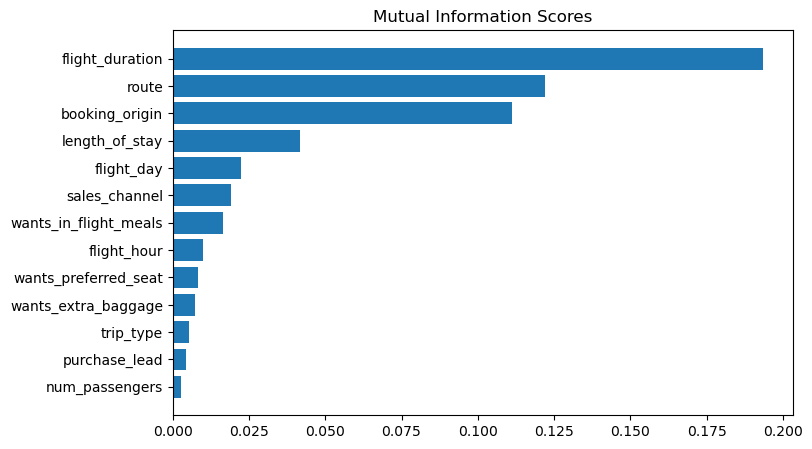

In [77]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores)
plt.savefig('mutualInfoScore.png',dpi=300,bbox_inches='tight')
plt.show()

In [73]:
mi_scores[0:5]

flight_duration    0.193549
route              0.122096
booking_origin     0.111084
length_of_stay     0.041680
flight_day         0.022244
Name: MI Scores, dtype: float64